In [1]:
import os
import torch
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datasets import Dataset
from PIL import Image
import numpy as np
import torchvision.transforms as transforms

# MNIST

### Local Models

In [108]:
# import os
# import json
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Setup style
# plt.rcParams.update({
#     "font.family": "serif",
#     "font.serif": ["Times New Roman"],
#     "axes.titlesize": 8,
#     "axes.labelsize": 8,
#     "xtick.labelsize": 8,
#     "ytick.labelsize": 8,
#     "legend.fontsize": 7,
#     "legend.title_fontsize": 8
# })

# sns.set_style("whitegrid")

# # --- Load JSON ---
# with open("/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots/results_drift-case.json") as f:
#     results = json.load(f)
    
# client_ids = sorted(results.keys(), key=int)
# client_colors = sns.color_palette("tab10", len(client_ids))

# # 1x2 subplots for accuracies only
# fig, axs = plt.subplots(1, 2, figsize=(7, 3))  # Wider layout for 2 plots
# axs = axs.flatten()

# titles = ["Global Accuracy (%)", "Local Accuracy (%)"]
# metrics = ["global_accuracy", "local_accuracy"]

# plot_handles = []
# plot_labels = []

# for idx, metric in enumerate(metrics):
#     ax = axs[idx]
#     for i, client_id in enumerate(client_ids):
#         values = results[client_id][metric]
#         if not values:
#             continue
#         rounds = range(1, len(values) + 1)
#         y_vals = [v * 100 for v in values]  # scale accuracy to percentage
#         line, = ax.plot(rounds, y_vals,
#                         label=f"Client {client_id}",
#                         color=client_colors[i],
#                         linewidth=1.2)
#         if idx == 0:
#             plot_handles.append(line)
#             plot_labels.append(f"Client {client_id}")

#     ax.set_xlabel("Rounds", fontweight="bold")
#     ax.set_ylabel(titles[idx], fontweight="bold")
#     ax.set_title(titles[idx], fontsize=8, fontweight="bold")
#     ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
#     ax.set_xlim(0, len(values) + 1)
#     ax.set_ylim(0, 100)  # Accuracy percentage range

# # Add shared legend outside the plot
# fig.legend(plot_handles, plot_labels, title="Clients",
#            loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False)

# plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave room for legend
# plt.show()

In [109]:
# # Setup style
# plt.rcParams.update({
#     "font.family": "serif",
#     "font.serif": ["Times New Roman"],
#     "axes.titlesize": 8,
#     "axes.labelsize": 8,
#     "xtick.labelsize": 8,
#     "ytick.labelsize": 8,
#     "legend.fontsize": 7,
#     "legend.title_fontsize": 8
# })

# sns.set_style("whitegrid")

# # --- Load JSON ---
# with open("/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots/results_retraining-case.json") as f:
#     results = json.load(f)
    
# client_ids = sorted(results.keys(), key=int)
# client_colors = sns.color_palette("tab10", len(client_ids))

# # 1x2 subplots for accuracies only
# fig, axs = plt.subplots(1, 2, figsize=(7, 3))  # Wider layout for 2 plots
# axs = axs.flatten()

# titles = ["Global Accuracy (%)", "Local Accuracy (%)"]
# metrics = ["global_accuracy", "local_accuracy"]

# plot_handles = []
# plot_labels = []

# for idx, metric in enumerate(metrics):
#     ax = axs[idx]
#     for i, client_id in enumerate(client_ids):
#         values = results[client_id][metric]
#         if not values:
#             continue
#         rounds = range(1, len(values) + 1)
#         y_vals = [v * 100 for v in values]  # scale accuracy to percentage
#         line, = ax.plot(rounds, y_vals,
#                         label=f"Client {client_id}",
#                         color=client_colors[i],
#                         linewidth=1.2)
#         if idx == 0:
#             plot_handles.append(line)
#             plot_labels.append(f"Client {client_id}")

#     ax.set_xlabel("Rounds", fontweight="bold")
#     ax.set_ylabel(titles[idx], fontweight="bold")
#     ax.set_title(titles[idx], fontsize=8, fontweight="bold")
#     ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
#     ax.set_xlim(0, len(values) + 1)
#     ax.set_ylim(0, 100)  # Accuracy percentage range

# # Add shared legend outside the plot
# fig.legend(plot_handles, plot_labels, title="Clients",
#            loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False)

# plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave room for legend
# plt.show()

In [110]:
# # Setup style
# plt.rcParams.update({
#     "font.family": "serif",
#     "font.serif": ["Times New Roman"],
#     "axes.titlesize": 8,
#     "axes.labelsize": 8,
#     "xtick.labelsize": 8,
#     "ytick.labelsize": 8,
#     "legend.fontsize": 7,
#     "legend.title_fontsize": 8
# })

# sns.set_style("whitegrid")

# # --- Load JSON ---
# with open("/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots/results_rapid-retraining-case.json") as f:
#     results = json.load(f)
    
# client_ids = sorted(results.keys(), key=int)
# client_colors = sns.color_palette("tab10", len(client_ids))

# # 1x2 subplots for accuracies only
# fig, axs = plt.subplots(1, 2, figsize=(7, 3))  # Wider layout for 2 plots
# axs = axs.flatten()

# titles = ["Global Accuracy (%)", "Local Accuracy (%)"]
# metrics = ["global_accuracy", "local_accuracy"]

# plot_handles = []
# plot_labels = []

# for idx, metric in enumerate(metrics):
#     ax = axs[idx]
#     for i, client_id in enumerate(client_ids):
#         values = results[client_id][metric]
#         if not values:
#             continue
#         rounds = range(1, len(values) + 1)
#         y_vals = [v * 100 for v in values]  # scale accuracy to percentage
#         line, = ax.plot(rounds, y_vals,
#                         label=f"Client {client_id}",
#                         color=client_colors[i],
#                         linewidth=1.2)
#         if idx == 0:
#             plot_handles.append(line)
#             plot_labels.append(f"Client {client_id}")

#     ax.set_xlabel("Rounds", fontweight="bold")
#     ax.set_ylabel(titles[idx], fontweight="bold")
#     ax.set_title(titles[idx], fontsize=8, fontweight="bold")
#     ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
#     ax.set_xlim(0, len(values) + 1)
#     ax.set_ylim(0, 100)  # Accuracy percentage range

# # Add shared legend outside the plot
# fig.legend(plot_handles, plot_labels, title="Clients",
#            loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False)

# plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave room for legend
# plt.show()

In [111]:
# # Setup style
# plt.rcParams.update({
#     "font.family": "serif",
#     "font.serif": ["Times New Roman"],
#     "axes.titlesize": 8,
#     "axes.labelsize": 8,
#     "xtick.labelsize": 8,
#     "ytick.labelsize": 8,
#     "legend.fontsize": 7,
#     "legend.title_fontsize": 8
# })

# sns.set_style("whitegrid")

# # --- Load JSON ---
# with open("/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots/results_fedau-case.json") as f:
#     results = json.load(f)
    
# client_ids = sorted(results.keys(), key=int)
# client_colors = sns.color_palette("tab10", len(client_ids))

# # 1x2 subplots for accuracies only
# fig, axs = plt.subplots(1, 2, figsize=(7, 3))  # Wider layout for 2 plots
# axs = axs.flatten()

# titles = ["Global Accuracy (%)", "Local Accuracy (%)"]
# metrics = ["global_accuracy", "local_accuracy"]

# plot_handles = []
# plot_labels = []

# for idx, metric in enumerate(metrics):
#     ax = axs[idx]
#     for i, client_id in enumerate(client_ids):
#         values = results[client_id][metric]
#         if not values:
#             continue
#         rounds = range(1, len(values) + 1)
#         y_vals = [v * 100 for v in values]  # scale accuracy to percentage
#         line, = ax.plot(rounds, y_vals,
#                         label=f"Client {client_id}",
#                         color=client_colors[i],
#                         linewidth=1.2)
#         if idx == 0:
#             plot_handles.append(line)
#             plot_labels.append(f"Client {client_id}")

#     ax.set_xlabel("Rounds", fontweight="bold")
#     ax.set_ylabel(titles[idx], fontweight="bold")
#     ax.set_title(titles[idx], fontsize=8, fontweight="bold")
#     ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
#     ax.set_xlim(0, len(values) + 1)
#     ax.set_ylim(0, 100)  # Accuracy percentage range

# # Add shared legend outside the plot
# fig.legend(plot_handles, plot_labels, title="Clients",
#            loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False)

# plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave room for legend
# plt.show()

In [112]:
# # Setup style
# plt.rcParams.update({
#     "font.family": "serif",
#     "font.serif": ["Times New Roman"],
#     "axes.titlesize": 8,
#     "axes.labelsize": 8,
#     "xtick.labelsize": 8,
#     "ytick.labelsize": 8,
#     "legend.fontsize": 7,
#     "legend.title_fontsize": 8
# })

# sns.set_style("whitegrid")

# # --- Load JSON ---
# with open("/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots/results_fluid-case.json") as f:
#     results = json.load(f)
    
# client_ids = sorted(results.keys(), key=int)
# client_colors = sns.color_palette("tab10", len(client_ids))

# # 1x2 subplots for accuracies only
# fig, axs = plt.subplots(1, 2, figsize=(7, 3))  # Wider layout for 2 plots
# axs = axs.flatten()

# titles = ["Global Accuracy (%)", "Local Accuracy (%)"]
# metrics = ["global_accuracy", "local_accuracy"]

# plot_handles = []
# plot_labels = []

# for idx, metric in enumerate(metrics):
#     ax = axs[idx]
#     for i, client_id in enumerate(client_ids):
#         values = results[client_id][metric]
#         if not values:
#             continue
#         rounds = range(1, len(values) + 1)
#         y_vals = [v * 100 for v in values]  # scale accuracy to percentage
#         line, = ax.plot(rounds, y_vals,
#                         label=f"Client {client_id}",
#                         color=client_colors[i],
#                         linewidth=1.2)
#         if idx == 0:
#             plot_handles.append(line)
#             plot_labels.append(f"Client {client_id}")

#     ax.set_xlabel("Rounds", fontweight="bold")
#     ax.set_ylabel(titles[idx], fontweight="bold")
#     ax.set_title(titles[idx], fontsize=8, fontweight="bold")
#     ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
#     ax.set_xlim(0, len(values) + 1)
#     ax.set_ylim(0, 100)  # Accuracy percentage range

# # Add shared legend outside the plot
# fig.legend(plot_handles, plot_labels, title="Clients",
#            loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False)

# plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave room for legend
# plt.show()

### Global Model

In [189]:
plot_dir = "/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots"

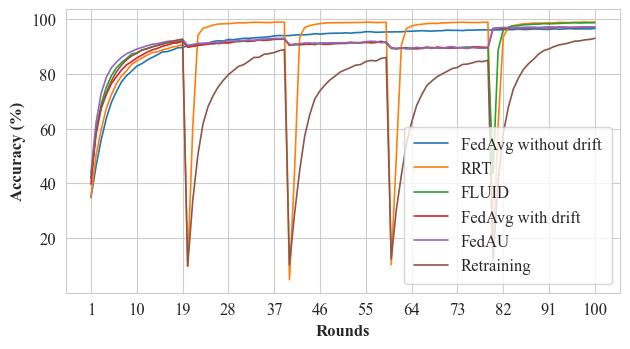

In [190]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set font style for IEEE
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "axes.titlesize": 12,
    "axes.labelsize": 12,          # Axis labels like "Accuracy"
    "xtick.labelsize": 12,        # Axis tick labels
    "ytick.labelsize": 12,
    "legend.fontsize": 12,          # Legend entries
    "legend.title_fontsize": 12   # Legend title (if any)
})

# List of JSON files
json_files = [f for f in os.listdir(plot_dir) if f.endswith(".json")]

global_accuracies = []
labels = []

for file in json_files:
    file_path = os.path.join(plot_dir, file)
    
    # Extract label from filename
    label = file.replace("results_", "").replace(".json", "")
    label = '-'.join([w.capitalize() for w in label.split('-')])
    if label == "Fedau-Case":
        label = "FedAU"
    elif label == "Fl-Case":
        label = "FedAvg without drift"
    elif label == "Drift-Case":
        label = "FedAvg with drift"
    elif label == "Retraining-Case":
        label = "Retraining"
    elif label == "Rapid-Retraining-Case":
        label = "RRT"
    elif label == "Fluid-Case":
        label = "FLUID"
    labels.append(label)
    
    with open(file_path, "r") as f:
        data = json.load(f)
    
    # Collect global_accuracy lists from all clients
    all_client_accuracies = [client_data["global_accuracy"] for client_data in data.values()]
    
    # Transpose and average round-wise
    avg_accuracies = np.mean(all_client_accuracies, axis=0)
    global_accuracies.append(avg_accuracies)

# Colors
client_colors = sns.color_palette("tab10", len(global_accuracies))

# Plot
plt.figure(figsize=(6.4, 3.6))  # IEEE double column width

for i, acc in enumerate(global_accuracies):
    rounds = range(1, len(acc) + 1)
    acc_percent = [a * 100 for a in acc]
    
    linestyle = '--' if labels[i] == "FedAvg" else '-'  # Dotted line for FedAvg
    
    plt.plot(rounds, acc_percent,
             label=labels[i],
             linewidth=1.2,
             linestyle=linestyle,
             color=client_colors[i])

plt.xlabel("Rounds", fontsize=12, fontweight="bold")
plt.ylabel("Accuracy (%)", fontsize=12, fontweight="bold")

plt.xticks(
    ticks=np.linspace(1, len(global_accuracies[0]), 12, dtype=int),
    fontsize=12
)
plt.yticks(fontsize=12)

plt.legend(loc="lower right", frameon=True, borderpad=0.6, framealpha=0.8)
plt.tight_layout()
plt.savefig("/Users/amankumar/Documents/MS/Sem4/Research Paper/global_mnist.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [160]:
import os
import json
import numpy as np
import pandas as pd

# Directories
plot_dirs = [
    "/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots_mnist/plots_incre_end_mnist_1",
    "/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots_mnist/plots_incre_end_mnist_2",
    "/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots_mnist/plots_incre_end_mnist_3"
]

label_map = {
    "fl-case": "FedAvg",
    "drift-case": "Natural Recovery",
    "retraining-case": "Retraining",
    "rapid-retraining-case": "RRT",
    "fedau-case": "FedAU",
    "fluid-case": "FLUID"
}

t1, t2, t3 = 20, 40, 60
final_round = 100
drift_end = 80

# Step 1: Collect all runs
all_runs_metrics = {}
fedavg_runs = []

for folder in plot_dirs:
    run_metrics = {}
    fedavg_acc = None

    for fname in os.listdir(folder):
        if not fname.endswith(".json"):
            continue

        key = fname.replace("results_", "").replace(".json", "").lower()
        label = label_map.get(key, key)

        with open(os.path.join(folder, fname), "r") as f:
            data = json.load(f)

        global_acc = np.mean([v["global_accuracy"] for v in data.values()], axis=0)

        if label == "FedAvg":
            fedavg_acc = global_acc
            fedavg_runs.append(global_acc)

        run_metrics[label] = global_acc

    # Store run metrics by method
    for label, acc in run_metrics.items():
        if label not in all_runs_metrics:
            all_runs_metrics[label] = []
        all_runs_metrics[label].append(acc)

# Step 2: Compute metrics per method across runs
records = []

for label, runs in all_runs_metrics.items():
    dips_t1, dips_t2, dips_t3, avg_dips, finals, recoveries = [], [], [], [], [], []

    for i in range(len(runs)):
        acc = runs[i]
        fedavg_acc = fedavg_runs[i]

        final_acc = acc[final_round - 1] * 100
        dip1 = (fedavg_acc[t1 - 1] - acc[t1 - 1]) * 100
        dip2 = (fedavg_acc[t2 - 1] - acc[t2 - 1]) * 100
        dip3 = (fedavg_acc[t3 - 1] - acc[t3 - 1]) * 100
        avg_dip = np.mean([dip1, dip2, dip3])

        # Recovery round
        if label == "FedAvg":
            recovery = 0
        else:
            fedavg_final = fedavg_acc[final_round - 1]
            recovery = ">20"
            for r in range(drift_end, final_round):
                if acc[r] >= fedavg_final:
                    recovery = r - drift_end
                    break

        dips_t1.append(dip1)
        dips_t2.append(dip2)
        dips_t3.append(dip3)
        avg_dips.append(avg_dip)
        finals.append(final_acc)
        recoveries.append(recovery)

    row = {"Method": label}
    row["Final Acc (%)"] = f"{np.mean(finals):.2f} ± {np.std(finals):.2f}"
    row["Dip@t1"] = f"{np.mean(dips_t1):.2f} ± {np.std(dips_t1):.2f}"
    row["Dip@t2"] = f"{np.mean(dips_t2):.2f} ± {np.std(dips_t2):.2f}"
    row["Dip@t3"] = f"{np.mean(dips_t3):.2f} ± {np.std(dips_t3):.2f}"
    row["Avg Dip"] = f"{np.mean(avg_dips):.2f} ± {np.std(avg_dips):.2f}"

    if all(isinstance(v, int) for v in recoveries):
        row["Recovery Rounds"] = f"{int(np.mean(recoveries))} ± {round(np.std(recoveries), 1)}"
    else:
        row["Recovery Rounds"] = ">" + str(final_round - drift_end)

    records.append(row)

# Step 3: Format table
df = pd.DataFrame(records)
df = df.set_index("Method")
print(df.to_markdown())

| Method           | Final Acc (%)   | Dip@t1       | Dip@t2       | Dip@t3       | Avg Dip      | Recovery Rounds   |
|:-----------------|:----------------|:-------------|:-------------|:-------------|:-------------|:------------------|
| FedAvg           | 96.83 ± 0.21    | 0.00 ± 0.00  | 0.00 ± 0.00  | 0.00 ± 0.00  | 0.00 ± 0.00  | 0 ± 0.0           |
| RRT              | 98.96 ± 0.03    | 81.22 ± 0.41 | 86.33 ± 2.85 | 86.30 ± 1.52 | 84.62 ± 1.11 | 2 ± 0.5           |
| FLUID            | 98.76 ± 0.06    | 0.70 ± 0.90  | 3.24 ± 0.67  | 6.12 ± 0.54  | 3.35 ± 0.68  | 2 ± 0.5           |
| Natural Recovery | 96.77 ± 0.07    | 2.42 ± 0.77  | 4.38 ± 0.23  | 6.83 ± 0.42  | 4.54 ± 0.46  | >20               |
| FedAU            | 97.11 ± 0.05    | 0.73 ± 0.58  | 3.46 ± 0.21  | 6.11 ± 0.31  | 3.43 ± 0.33  | 3 ± 4.2           |
| Retraining       | 91.90 ± 0.96    | 82.57 ± 1.52 | 84.13 ± 1.50 | 85.55 ± 2.01 | 84.08 ± 1.47 | >20               |


In [56]:
# Create a DataFrame to hold the average accuracies per round for each method
methods = list(all_runs_metrics.keys())
rounds = np.arange(1, final_round + 1)

avg_acc_per_round = pd.DataFrame(index=rounds)

for method in methods:
    runs = all_runs_metrics[method]  # list of np.arrays with accuracy per round
    # Stack runs along a new axis and take mean along axis=0 (mean per round)
    mean_acc = np.mean(np.stack(runs), axis=0)
    # Convert to percentage
    mean_acc_pct = mean_acc * 100
    avg_acc_per_round[method] = mean_acc_pct

print(avg_acc_per_round.to_markdown())

|     |   FedAvg |    RRT |   FLUID |   Natural Recovery |   FedAU |   Retraining |
|----:|---------:|-------:|--------:|-------------------:|--------:|-------------:|
|   1 |   38.725 | 38.145 |  39.72  |             36.005 |  32.835 |       41.54  |
|   2 |   57.705 | 54.565 |  59.005 |             53.205 |  50.485 |       55.75  |
|   3 |   68.265 | 64.33  |  68.975 |             64.585 |  62.01  |       64.245 |
|   4 |   74.155 | 70.55  |  75.12  |             71.98  |  69.875 |       69.765 |
|   5 |   78.05  | 75.26  |  79.02  |             76.675 |  75.325 |       73.755 |
|   6 |   81.05  | 78.42  |  81.525 |             79.44  |  79.045 |       76.84  |
|   7 |   82.855 | 81.175 |  83.665 |             81.405 |  81.745 |       79.625 |
|   8 |   84.495 | 83     |  85.515 |             83.325 |  84.145 |       81.935 |
|   9 |   85.425 | 84.985 |  86.88  |             84.565 |  85.47  |       83.505 |
|  10 |   86.57  | 86.325 |  87.81  |             85.66  |  87.005 |       8

### Drifted Clients

In [117]:
# import os
# import json
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Global IEEE-compliant font style
# plt.rcParams.update({
#     "font.family": "serif",
#     "font.serif": ["Times New Roman"],
#     "axes.titlesize": 8,
#     "axes.labelsize": 9,
#     "xtick.labelsize": 8,
#     "ytick.labelsize": 8,
#     "legend.fontsize": 7,
#     "legend.title_fontsize": 8
# })

# client_colors = sns.color_palette("tab10", 10)
# selected_clients = {"1", "5", "7"}

# # Load all relevant result files
# result_files = [f for f in os.listdir(plot_dir) if f.endswith(".json") and f.startswith("results_")]

# # Define desired display order and proper label mapping
# desired_order = ["FedAvg", "Natural Recovery", "Retraining-Case", "RRT", "FedAU", "FLUID"]
# label_map = {
#     "Fl-Case": "FedAvg",
#     "Drift-Case": "Natural Recovery",
#     "Retraining-Case": "Retraining-Case",
#     "Rapid-Retraining-Case": "RRT",
#     "Fedau-Case": "FedAU",
#     "Fluid-Case": "FLUID"
# }

# plot_data = []

# # Process each result file
# for i, file_name in enumerate(result_files):
#     file_path = os.path.join(plot_dir, file_name)
#     with open(file_path, "r") as f:
#         data = json.load(f)

#     # Collect global_accuracy for selected drifted clients
#     drifted_accuracies = [
#         data[cid]["global_accuracy"] for cid in selected_clients if cid in data
#     ]

#     if not drifted_accuracies:
#         continue

#     # Average drifted accuracies across clients
#     avg_accuracies = np.mean(drifted_accuracies, axis=0) * 100

#     # Normalize and map label
#     raw_label = file_name.replace("results_", "").replace(".json", "")
#     raw_label = '-'.join([w.capitalize() for w in raw_label.split('-')])
#     label = label_map.get(raw_label)

#     if label in desired_order:
#         plot_data.append((label, avg_accuracies, client_colors[i % len(client_colors)]))

# # Sort by desired order
# plot_data.sort(key=lambda x: desired_order.index(x[0]))

# # Plot
# plt.figure(figsize=(6.4, 3.6))

# for label, avg_acc, color in plot_data:
#     linestyle = '--' if label == "FedAvg" else '-'
#     plt.plot(range(1, len(avg_acc) + 1), avg_acc,
#              label=label, color=color, linewidth=1.2, linestyle=linestyle)

# # Axis labels and grid
# plt.xlabel("Rounds", fontweight="bold")
# plt.ylabel("Accuracy (%)", fontweight="bold")
# plt.xticks(np.arange(0, 101, 10))
# plt.yticks()
# plt.xlim(0, 105)
# plt.grid(False, linestyle="--", linewidth=0.5, alpha=0.6)

# # Legend inside bottom right
# plt.legend(loc="lower right", frameon=True, framealpha=0.85, borderpad=0.6)

# plt.tight_layout()
# plt.savefig("/Users/amankumar/Documents/MS/Sem4/Research Paper/drifted_mnist.pdf", format="pdf", bbox_inches="tight")
# plt.show()

# FMNIST

### Local Models 

In [118]:
# import os
# import json
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Setup style
# plt.rcParams.update({
#     "font.family": "serif",
#     "font.serif": ["Times New Roman"],
#     "axes.titlesize": 8,
#     "axes.labelsize": 8,
#     "xtick.labelsize": 8,
#     "ytick.labelsize": 8,
#     "legend.fontsize": 7,
#     "legend.title_fontsize": 8
# })

# sns.set_style("whitegrid")

# # --- Load JSON ---
# with open("/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots_incre_end_fmnist/results_drift-case.json") as f:
#     results = json.load(f)
    
# client_ids = sorted(results.keys(), key=int)
# client_colors = sns.color_palette("tab10", len(client_ids))

# # 1x2 subplots for accuracies only
# fig, axs = plt.subplots(1, 2, figsize=(7, 3))  # Wider layout for 2 plots
# axs = axs.flatten()

# titles = ["Global Accuracy (%)", "Local Accuracy (%)"]
# metrics = ["global_accuracy", "local_accuracy"]

# plot_handles = []
# plot_labels = []

# for idx, metric in enumerate(metrics):
#     ax = axs[idx]
#     for i, client_id in enumerate(client_ids):
#         values = results[client_id][metric]
#         if not values:
#             continue
#         rounds = range(1, len(values) + 1)
#         y_vals = [v * 100 for v in values]  # scale accuracy to percentage
#         line, = ax.plot(rounds, y_vals,
#                         label=f"Client {client_id}",
#                         color=client_colors[i],
#                         linewidth=1.2)
#         if idx == 0:
#             plot_handles.append(line)
#             plot_labels.append(f"Client {client_id}")

#     ax.set_xlabel("Rounds", fontweight="bold")
#     ax.set_ylabel(titles[idx], fontweight="bold")
#     ax.set_title(titles[idx], fontsize=8, fontweight="bold")
#     ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
#     ax.set_xlim(0, len(values) + 1)
#     ax.set_ylim(0, 100)  # Accuracy percentage range

# # Add shared legend outside the plot
# fig.legend(plot_handles, plot_labels, title="Clients",
#            loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False)

# plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave room for legend
# plt.show()

In [119]:
# # Setup style
# plt.rcParams.update({
#     "font.family": "serif",
#     "font.serif": ["Times New Roman"],
#     "axes.titlesize": 8,
#     "axes.labelsize": 8,
#     "xtick.labelsize": 8,
#     "ytick.labelsize": 8,
#     "legend.fontsize": 7,
#     "legend.title_fontsize": 8
# })

# sns.set_style("whitegrid")

# # --- Load JSON ---
# with open("/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots_incre_end_fmnist/results_retraining-case.json") as f:
#     results = json.load(f)
    
# client_ids = sorted(results.keys(), key=int)
# client_colors = sns.color_palette("tab10", len(client_ids))

# # 1x2 subplots for accuracies only
# fig, axs = plt.subplots(1, 2, figsize=(7, 3))  # Wider layout for 2 plots
# axs = axs.flatten()

# titles = ["Global Accuracy (%)", "Local Accuracy (%)"]
# metrics = ["global_accuracy", "local_accuracy"]

# plot_handles = []
# plot_labels = []

# for idx, metric in enumerate(metrics):
#     ax = axs[idx]
#     for i, client_id in enumerate(client_ids):
#         values = results[client_id][metric]
#         if not values:
#             continue
#         rounds = range(1, len(values) + 1)
#         y_vals = [v * 100 for v in values]  # scale accuracy to percentage
#         line, = ax.plot(rounds, y_vals,
#                         label=f"Client {client_id}",
#                         color=client_colors[i],
#                         linewidth=1.2)
#         if idx == 0:
#             plot_handles.append(line)
#             plot_labels.append(f"Client {client_id}")

#     ax.set_xlabel("Rounds", fontweight="bold")
#     ax.set_ylabel(titles[idx], fontweight="bold")
#     ax.set_title(titles[idx], fontsize=8, fontweight="bold")
#     ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
#     ax.set_xlim(0, len(values) + 1)
#     ax.set_ylim(0, 100)  # Accuracy percentage range

# # Add shared legend outside the plot
# fig.legend(plot_handles, plot_labels, title="Clients",
#            loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False)

# plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave room for legend
# plt.show()

In [120]:
# # Setup style
# plt.rcParams.update({
#     "font.family": "serif",
#     "font.serif": ["Times New Roman"],
#     "axes.titlesize": 8,
#     "axes.labelsize": 8,
#     "xtick.labelsize": 8,
#     "ytick.labelsize": 8,
#     "legend.fontsize": 7,
#     "legend.title_fontsize": 8
# })

# sns.set_style("whitegrid")

# # --- Load JSON ---
# with open("/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots_incre_end_fmnist/results_rapid-retraining-case.json") as f:
#     results = json.load(f)
    
# client_ids = sorted(results.keys(), key=int)
# client_colors = sns.color_palette("tab10", len(client_ids))

# # 1x2 subplots for accuracies only
# fig, axs = plt.subplots(1, 2, figsize=(7, 3))  # Wider layout for 2 plots
# axs = axs.flatten()

# titles = ["Global Accuracy (%)", "Local Accuracy (%)"]
# metrics = ["global_accuracy", "local_accuracy"]

# plot_handles = []
# plot_labels = []

# for idx, metric in enumerate(metrics):
#     ax = axs[idx]
#     for i, client_id in enumerate(client_ids):
#         values = results[client_id][metric]
#         if not values:
#             continue
#         rounds = range(1, len(values) + 1)
#         y_vals = [v * 100 for v in values]  # scale accuracy to percentage
#         line, = ax.plot(rounds, y_vals,
#                         label=f"Client {client_id}",
#                         color=client_colors[i],
#                         linewidth=1.2)
#         if idx == 0:
#             plot_handles.append(line)
#             plot_labels.append(f"Client {client_id}")

#     ax.set_xlabel("Rounds", fontweight="bold")
#     ax.set_ylabel(titles[idx], fontweight="bold")
#     ax.set_title(titles[idx], fontsize=8, fontweight="bold")
#     ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
#     ax.set_xlim(0, len(values) + 1)
#     ax.set_ylim(0, 100)  # Accuracy percentage range

# # Add shared legend outside the plot
# fig.legend(plot_handles, plot_labels, title="Clients",
#            loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False)

# plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave room for legend
# plt.show()

In [121]:
# # Setup style
# plt.rcParams.update({
#     "font.family": "serif",
#     "font.serif": ["Times New Roman"],
#     "axes.titlesize": 8,
#     "axes.labelsize": 8,
#     "xtick.labelsize": 8,
#     "ytick.labelsize": 8,
#     "legend.fontsize": 7,
#     "legend.title_fontsize": 8
# })

# sns.set_style("whitegrid")

# # --- Load JSON ---
# with open("/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots/results_fedau-case.json") as f:
#     results = json.load(f)
    
# client_ids = sorted(results.keys(), key=int)
# client_colors = sns.color_palette("tab10", len(client_ids))

# # 1x2 subplots for accuracies only
# fig, axs = plt.subplots(1, 2, figsize=(7, 3))  # Wider layout for 2 plots
# axs = axs.flatten()

# titles = ["Global Accuracy (%)", "Local Accuracy (%)"]
# metrics = ["global_accuracy", "local_accuracy"]

# plot_handles = []
# plot_labels = []

# for idx, metric in enumerate(metrics):
#     ax = axs[idx]
#     for i, client_id in enumerate(client_ids):
#         values = results[client_id][metric]
#         if not values:
#             continue
#         rounds = range(1, len(values) + 1)
#         y_vals = [v * 100 for v in values]  # scale accuracy to percentage
#         line, = ax.plot(rounds, y_vals,
#                         label=f"Client {client_id}",
#                         color=client_colors[i],
#                         linewidth=1.2)
#         if idx == 0:
#             plot_handles.append(line)
#             plot_labels.append(f"Client {client_id}")

#     ax.set_xlabel("Rounds", fontweight="bold")
#     ax.set_ylabel(titles[idx], fontweight="bold")
#     ax.set_title(titles[idx], fontsize=8, fontweight="bold")
#     ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
#     ax.set_xlim(0, len(values) + 1)
#     ax.set_ylim(0, 100)  # Accuracy percentage range

# # Add shared legend outside the plot
# fig.legend(plot_handles, plot_labels, title="Clients",
#            loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False)

# plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave room for legend
# plt.show()

In [122]:
# # Setup style
# plt.rcParams.update({
#     "font.family": "serif",
#     "font.serif": ["Times New Roman"],
#     "axes.titlesize": 8,
#     "axes.labelsize": 8,
#     "xtick.labelsize": 8,
#     "ytick.labelsize": 8,
#     "legend.fontsize": 7,
#     "legend.title_fontsize": 8
# })

# sns.set_style("whitegrid")

# # --- Load JSON ---
# with open("/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots_incre_end_fmnist/results_fluid-case.json") as f:
#     results = json.load(f)
    
# client_ids = sorted(results.keys(), key=int)
# client_colors = sns.color_palette("tab10", len(client_ids))

# # 1x2 subplots for accuracies only
# fig, axs = plt.subplots(1, 2, figsize=(7, 3))  # Wider layout for 2 plots
# axs = axs.flatten()

# titles = ["Global Accuracy (%)", "Local Accuracy (%)"]
# metrics = ["global_accuracy", "local_accuracy"]

# plot_handles = []
# plot_labels = []

# for idx, metric in enumerate(metrics):
#     ax = axs[idx]
#     for i, client_id in enumerate(client_ids):
#         values = results[client_id][metric]
#         if not values:
#             continue
#         rounds = range(1, len(values) + 1)
#         y_vals = [v * 100 for v in values]  # scale accuracy to percentage
#         line, = ax.plot(rounds, y_vals,
#                         label=f"Client {client_id}",
#                         color=client_colors[i],
#                         linewidth=1.2)
#         if idx == 0:
#             plot_handles.append(line)
#             plot_labels.append(f"Client {client_id}")

#     ax.set_xlabel("Rounds", fontweight="bold")
#     ax.set_ylabel(titles[idx], fontweight="bold")
#     ax.set_title(titles[idx], fontsize=8, fontweight="bold")
#     ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
#     ax.set_xlim(0, len(values) + 1)
#     ax.set_ylim(0, 100)  # Accuracy percentage range

# # Add shared legend outside the plot
# fig.legend(plot_handles, plot_labels, title="Clients",
#            loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False)

# plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave room for legend
# plt.show()

### Global Model

In [145]:
plot_dir = "/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots_fmnist/plots_incre_end_fmnist_3"

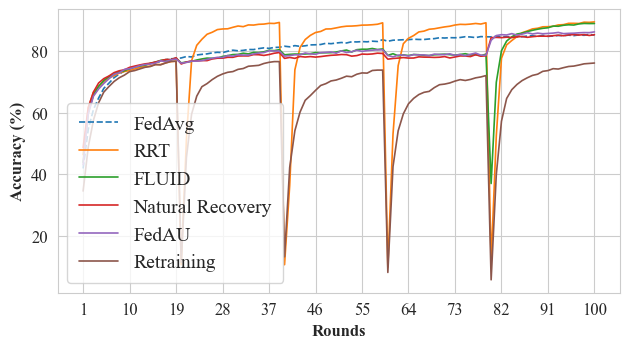

In [146]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set font style for IEEE
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "axes.titlesize": 14,
    "axes.labelsize": 14,          # Axis labels like "Accuracy"
    "xtick.labelsize": 14,        # Axis tick labels
    "ytick.labelsize": 14,
    "legend.fontsize": 14,          # Legend entries
    "legend.title_fontsize": 14   # Legend title (if any)
})

# List of JSON files
json_files = [f for f in os.listdir(plot_dir) if f.endswith(".json")]

global_accuracies = []
labels = []

for file in json_files:
    file_path = os.path.join(plot_dir, file)
    
    # Extract label from filename
    label = file.replace("results_", "").replace(".json", "")
    label = '-'.join([w.capitalize() for w in label.split('-')])
    if label == "Fedau-Case":
        label = "FedAU"
    elif label == "Fl-Case":
        label = "FedAvg"
    elif label == "Drift-Case":
        label = "Natural Recovery"
    elif label == "Retraining-Case":
        label = "Retraining"
    elif label == "Rapid-Retraining-Case":
        label = "RRT"
    elif label == "Fluid-Case":
        label = "FLUID"
    labels.append(label)
    
    with open(file_path, "r") as f:
        data = json.load(f)
    
    # Collect global_accuracy lists from all clients
    all_client_accuracies = [client_data["global_accuracy"] for client_data in data.values()]
    
    # Transpose and average round-wise
    avg_accuracies = np.mean(all_client_accuracies, axis=0)
    global_accuracies.append(avg_accuracies)

# Colors
client_colors = sns.color_palette("tab10", len(global_accuracies))

# Plot
plt.figure(figsize=(6.4, 3.6))  # IEEE double column width

for i, acc in enumerate(global_accuracies):
    rounds = range(1, len(acc) + 1)
    acc_percent = [a * 100 for a in acc]
    
    linestyle = '--' if labels[i] == "FedAvg" else '-'  # Dotted line for FedAvg
    
    plt.plot(rounds, acc_percent,
             label=labels[i],
             linewidth=1.2,
             linestyle=linestyle,
             color=client_colors[i])

plt.xlabel("Rounds", fontsize=12, fontweight="bold")
plt.ylabel("Accuracy (%)", fontsize=12, fontweight="bold")

plt.xticks(
    ticks=np.linspace(1, len(global_accuracies[0]), 12, dtype=int),
    fontsize=12
)
plt.yticks(fontsize=12)

# Legend
plt.legend(loc="lower left", frameon=True, borderpad=0.6, framealpha=0.8)

plt.tight_layout()
plt.savefig("/Users/amankumar/Documents/MS/Sem4/Research Paper/global_fmnist.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [186]:
import os
import json
import numpy as np
import pandas as pd

# Directories
plot_dirs = [
    "/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots_fmnist/plots_incre_end_fmnist_1",
    "/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots_fmnist/plots_incre_end_fmnist_2",
#     "/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots_fmnist/plots_incre_end_fmnist_3"
]

label_map = {
    "fl-case": "FedAvg",
    "drift-case": "Natural Recovery",
    "retraining-case": "Retraining",
    "rapid-retraining-case": "RRT",
    "fedau-case": "FedAU",
    "fluid-case": "FLUID"
}

t1, t2, t3 = 20, 40, 60
final_round = 100
drift_end = 80

# Step 1: Collect all runs
all_runs_metrics = {}
fedavg_runs = []

for folder in plot_dirs:
    run_metrics = {}
    fedavg_acc = None

    for fname in os.listdir(folder):
        if not fname.endswith(".json"):
            continue

        key = fname.replace("results_", "").replace(".json", "").lower()
        label = label_map.get(key, key)

        with open(os.path.join(folder, fname), "r") as f:
            data = json.load(f)

        global_acc = np.mean([v["global_accuracy"] for v in data.values()], axis=0)

        if label == "FedAvg":
            fedavg_acc = global_acc
            fedavg_runs.append(global_acc)

        run_metrics[label] = global_acc

    # Store run metrics by method
    for label, acc in run_metrics.items():
        if label not in all_runs_metrics:
            all_runs_metrics[label] = []
        all_runs_metrics[label].append(acc)

# Step 2: Compute metrics per method across runs
records = []

for label, runs in all_runs_metrics.items():
    dips_t1, dips_t2, dips_t3, avg_dips, finals, recoveries = [], [], [], [], [], []

    for i in range(len(runs)):
        acc = runs[i]
        fedavg_acc = fedavg_runs[i]

        final_acc = acc[final_round - 1] * 100
        dip1 = (fedavg_acc[t1 - 1] - acc[t1 - 1]) * 100
        dip2 = (fedavg_acc[t2 - 1] - acc[t2 - 1]) * 100
        dip3 = (fedavg_acc[t3 - 1] - acc[t3 - 1]) * 100
        avg_dip = np.mean([dip1, dip2, dip3])

        # Recovery round
        if label == "FedAvg":
            recovery = 0
        else:
            fedavg_final = fedavg_acc[final_round - 1]
            recovery = ">20"
            for r in range(drift_end, final_round):
                if acc[r] >= fedavg_final:
                    recovery = r - drift_end
                    break

        dips_t1.append(dip1)
        dips_t2.append(dip2)
        dips_t3.append(dip3)
        avg_dips.append(avg_dip)
        finals.append(final_acc)
        recoveries.append(recovery)

    row = {"Method": label}
    row["Final Acc (%)"] = f"{np.mean(finals):.2f} ± {np.std(finals):.2f}"
    row["Dip@t1"] = f"{np.mean(dips_t1):.2f} ± {np.std(dips_t1):.2f}"
    row["Dip@t2"] = f"{np.mean(dips_t2):.2f} ± {np.std(dips_t2):.2f}"
    row["Dip@t3"] = f"{np.mean(dips_t3):.2f} ± {np.std(dips_t3):.2f}"
    row["Avg Dip"] = f"{np.mean(avg_dips):.2f} ± {np.std(avg_dips):.2f}"

    if all(isinstance(v, int) for v in recoveries):
        row["Recovery Rounds"] = f"{int(np.mean(recoveries))} ± {round(np.std(recoveries), 1)}"
    else:
        row["Recovery Rounds"] = ">" + str(final_round - drift_end)

    records.append(row)

# Step 3: Format table
df = pd.DataFrame(records)
df = df.set_index("Method")
print(df.to_markdown())

| Method           | Final Acc (%)   | Dip@t1       | Dip@t2       | Dip@t3       | Avg Dip      | Recovery Rounds   |
|:-----------------|:----------------|:-------------|:-------------|:-------------|:-------------|:------------------|
| FedAvg           | 85.55 ± 0.02    | 0.00 ± 0.00  | 0.00 ± 0.00  | 0.00 ± 0.00  | 0.00 ± 0.00  | 0 ± 0.0           |
| RRT              | 88.97 ± 0.31    | 64.59 ± 0.44 | 72.18 ± 1.23 | 75.76 ± 1.76 | 70.84 ± 0.03 | 5 ± 1.5           |
| FLUID            | 89.09 ± 0.03    | 2.56 ± 0.49  | 3.27 ± 0.07  | 5.89 ± 0.73  | 3.91 ± 0.06  | 5 ± 0.0           |
| Natural Recovery | 85.00 ± 0.00    | 2.93 ± 0.35  | 4.76 ± 0.31  | 6.74 ± 0.47  | 4.81 ± 0.14  | >20               |
| FedAU            | 85.48 ± 0.70    | 1.35 ± 0.37  | 2.41 ± 0.25  | 5.43 ± 0.53  | 3.06 ± 0.38  | >20               |
| Retraining       | 75.72 ± 0.86    | 67.30 ± 0.97 | 73.04 ± 1.72 | 74.05 ± 1.70 | 71.47 ± 1.46 | >20               |


In [142]:
# Create a DataFrame to hold the average accuracies per round for each method
methods = list(all_runs_metrics.keys())
rounds = np.arange(1, final_round + 1)

avg_acc_per_round = pd.DataFrame(index=rounds)

for method in methods:
    runs = all_runs_metrics[method]  # list of np.arrays with accuracy per round
    # Stack runs along a new axis and take mean along axis=0 (mean per round)
    mean_acc = np.mean(np.stack(runs), axis=0)
    # Convert to percentage
    mean_acc_pct = mean_acc * 100
    avg_acc_per_round[method] = mean_acc_pct

print(avg_acc_per_round.to_markdown())

|     |   FedAvg |     RRT |   FLUID |   Natural Recovery |   FedAU |   Retraining |
|----:|---------:|--------:|--------:|-------------------:|--------:|-------------:|
|   1 |  44.2033 | 46.66   | 43.28   |            39.2467 | 43.1867 |     43.14    |
|   2 |  58.2567 | 59.3233 | 57.3833 |            55.27   | 57.2767 |     56.2433  |
|   3 |  64.26   | 64.0533 | 63.25   |            62.2833 | 64.0967 |     62.1367  |
|   4 |  67.4933 | 66.6867 | 66.9067 |            66.36   | 67.5767 |     65.92    |
|   5 |  69.5967 | 68.75   | 69.41   |            68.6167 | 69.6233 |     68.3267  |
|   6 |  71.06   | 70.4033 | 71.0533 |            70.02   | 71.19   |     69.6067  |
|   7 |  72.1    | 71.5167 | 72.0233 |            70.9867 | 72.6167 |     71.0867  |
|   8 |  73.07   | 72.4167 | 72.6967 |            71.8767 | 73.22   |     71.6733  |
|   9 |  73.7567 | 73.21   | 73.29   |            72.4267 | 74.1533 |     72.5967  |
|  10 |  74.41   | 73.67   | 73.93   |            73.2233 | 74.57

### Drifted clients plots

In [125]:
# import os
# import json
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Global IEEE-compliant font style
# plt.rcParams.update({
#     "font.family": "serif",
#     "font.serif": ["Times New Roman"],
#     "axes.titlesize": 8,
#     "axes.labelsize": 9,
#     "xtick.labelsize": 8,
#     "ytick.labelsize": 8,
#     "legend.fontsize": 7,
#     "legend.title_fontsize": 8
# })

# client_colors = sns.color_palette("tab10", 10)
# selected_clients = {"1", "5", "7"}

# # Load all relevant result files
# result_files = [f for f in os.listdir(plot_dir) if f.endswith(".json") and f.startswith("results_")]

# # Define desired display order and proper label mapping
# desired_order = ["FedAvg", "Natural Recovery", "Retraining-Case", "RRT", "FedAU", "FLUID"]
# label_map = {
#     "Fl-Case": "FedAvg",
#     "Drift-Case": "Natural Recovery",
#     "Retraining-Case": "Retraining-Case",
#     "Rapid-Retraining-Case": "RRT",
#     "Fedau-Case": "FedAU",
#     "Fluid-Case": "FLUID"
# }

# plot_data = []

# # Process each result file
# for i, file_name in enumerate(result_files):
#     file_path = os.path.join(plot_dir, file_name)
#     with open(file_path, "r") as f:
#         data = json.load(f)

#     # Collect global_accuracy for selected drifted clients
#     drifted_accuracies = [
#         data[cid]["global_accuracy"] for cid in selected_clients if cid in data
#     ]

#     if not drifted_accuracies:
#         continue

#     # Average drifted accuracies across clients
#     avg_accuracies = np.mean(drifted_accuracies, axis=0) * 100

#     # Normalize and map label
#     raw_label = file_name.replace("results_", "").replace(".json", "")
#     raw_label = '-'.join([w.capitalize() for w in raw_label.split('-')])
#     label = label_map.get(raw_label)

#     if label in desired_order:
#         plot_data.append((label, avg_accuracies, client_colors[i % len(client_colors)]))

# # Sort by desired order
# plot_data.sort(key=lambda x: desired_order.index(x[0]))

# # Plot
# plt.figure(figsize=(6.4, 3.6))

# for label, avg_acc, color in plot_data:
#     linestyle = '--' if label == "FedAvg" else '-'
#     plt.plot(range(1, len(avg_acc) + 1), avg_acc,
#              label=label, color=color, linewidth=1.2, linestyle=linestyle)

# # Axis labels and grid
# plt.xlabel("Rounds", fontweight="bold")
# plt.ylabel("Accuracy (%)", fontweight="bold")
# plt.xticks(np.arange(0, 101, 10))
# plt.yticks()
# plt.xlim(0, 105)
# plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)

# # Legend inside bottom right
# plt.legend(loc="lower right", frameon=True, framealpha=0.85, borderpad=0.6)

# plt.tight_layout()
# plt.savefig("/Users/amankumar/Documents/MS/Sem4/Research Paper/drifted_fmnist.pdf", format="pdf", bbox_inches="tight")
# plt.show()

# Paper Plot

In [169]:
color_map = {
    "FedAvg without drift": "#1f77b4",
    "FedAvg with drift": "#d62728",
    "Retraining": "#ff7f0e",
    "RRT": "#2ca02c",
    "FedAU": "#9467bd",
    "FLUID": "#17becf"
}

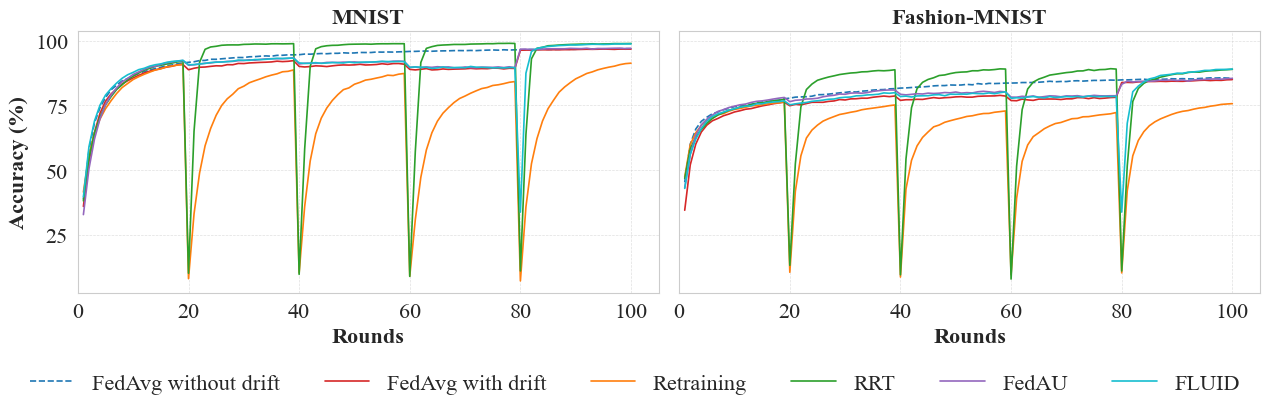

In [185]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Font settings (IEEE style)
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "axes.titlesize": 16,
    "axes.labelsize": 16,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 16,
    "legend.title_fontsize": 16
})

# Method label mapping
label_map = {
    "fl-case": "FedAvg without drift",
    "drift-case": "FedAvg with drift",
    "retraining-case": "Retraining",
    "rapid-retraining-case": "RRT",
    "fedau-case": "FedAU",
    "fluid-case": "FLUID"
}

# Paths
mnist_dirs = [
     "/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots_mnist/plots_incre_end_mnist_1",
      "/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots_mnist/plots_incre_end_mnist_2",
#     "/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots_mnist/plots_incre_end_mnist_3"
]

fmnist_dirs = [
     "/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots_fmnist/plots_incre_end_fmnist_1",
    "/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots_fmnist/plots_incre_end_fmnist_2",
#     "/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots_fmnist/plots_incre_end_fmnist_3"
]

def load_avg_global_accuracy(plot_dirs):
    method_accuracies = {label: [] for label in label_map.values()}

    for plot_dir in plot_dirs:
        for file in os.listdir(plot_dir):
            if not file.endswith(".json"):
                continue
            key = file.replace("results_", "").replace(".json", "").lower()
            label = label_map.get(key)
            if not label:
                continue
            with open(os.path.join(plot_dir, file)) as f:
                data = json.load(f)
            client_accs = [v["global_accuracy"] for v in data.values()]
            avg_acc = np.mean(client_accs, axis=0)
            method_accuracies[label].append(avg_acc)

    # Average across runs
    avg_accuracies = {}
    for label, runs in method_accuracies.items():
        avg_accuracies[label] = np.mean(runs, axis=0)
    return avg_accuracies

# Load both datasets
mnist_data = load_avg_global_accuracy(mnist_dirs)
fmnist_data = load_avg_global_accuracy(fmnist_dirs)

# Define consistent method order
ordered_labels = ["FedAvg without drift", "FedAvg with drift", "Retraining", "RRT", "FedAU", "FLUID"]
colors = sns.color_palette("tab10", len(ordered_labels))

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.0), sharey=True)

# --- MNIST ---
for i, label in enumerate(ordered_labels):
    acc = mnist_data[label] * 100
    linestyle = '--' if label == "FedAvg without drift" else '-'
    axes[0].plot(range(1, len(acc) + 1), acc,
             label=label,
             linewidth=1.2,
             linestyle=linestyle,
             color=color_map[label])
axes[0].set_title("MNIST", fontweight="bold")
axes[0].set_xlabel("Rounds", fontweight="bold")
axes[0].set_ylabel("Accuracy (%)", fontweight="bold")
axes[0].grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
axes[0].set_xlim([0, 105])
axes[0].set_xticks(np.arange(0, 101, 20))

# --- FMNIST ---
for i, label in enumerate(ordered_labels):
    acc = fmnist_data[label] * 100
    linestyle = '--' if label == "FedAvg without drift" else '-'
    axes[1].plot(range(1, len(acc) + 1), acc,
             label=label,
             linewidth=1.2,
             linestyle=linestyle,
             color=color_map[label])
axes[1].set_title("Fashion-MNIST", fontweight="bold")
axes[1].set_xlabel("Rounds", fontweight="bold")
axes[1].grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
axes[1].set_xlim([0, 105])
axes[1].set_xticks(np.arange(0, 101, 20))

# Legend below both plots
fig.legend(ordered_labels,
           loc="lower center",
           ncol=len(ordered_labels),
           frameon=False,
           bbox_to_anchor=(0.5, -0.05))

plt.tight_layout(rect=[0, 0.08, 1, 1])  # leave space for legend
plt.savefig("/Users/amankumar/Documents/MS/Sem4/Research Paper/global_mnist_fmnist.pdf", format="pdf", bbox_inches="tight")
plt.show()

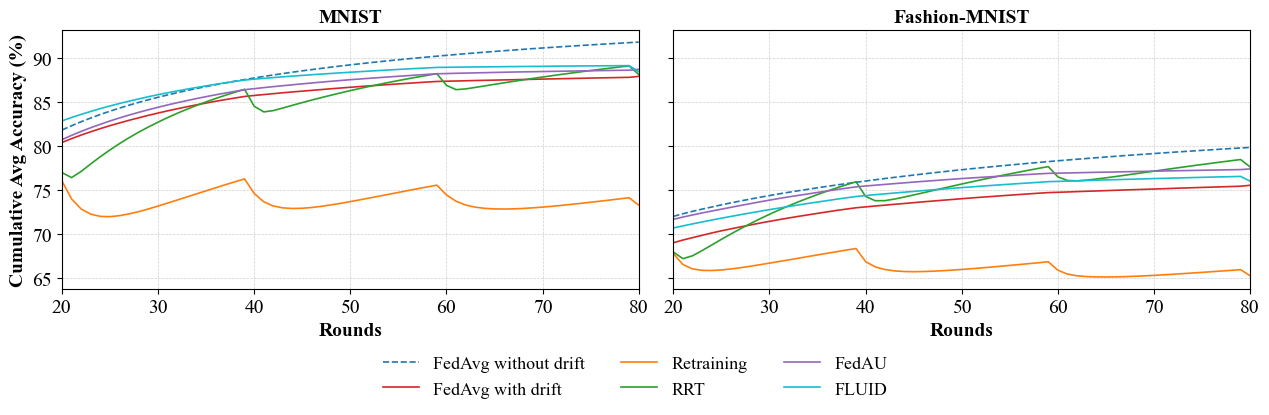

|                      | MNIST        | FMNIST       |
|:---------------------|:-------------|:-------------|
| FedAvg without drift | 95.07 ± 0.30 | 82.43 ± 0.05 |
| FedAvg with drift    | 90.36 ± 0.02 | 77.71 ± 0.17 |
| Retraining           | 72.38 ± 0.22 | 64.46 ± 0.82 |
| RRT                  | 91.79 ± 0.10 | 80.83 ± 0.14 |
| FedAU                | 91.33 ± 0.12 | 79.29 ± 0.40 |
| FLUID                | 90.25 ± 0.13 | 77.77 ± 0.21 |


In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Font settings
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "axes.titlesize": 14,
    "axes.labelsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 13,
    "legend.title_fontsize": 13
})

# Label and color mapping
label_map = {
    "fl-case": "FedAvg without drift",
    "drift-case": "FedAvg with drift",
    "retraining-case": "Retraining",
    "rapid-retraining-case": "RRT",
    "fedau-case": "FedAU",
    "fluid-case": "FLUID"
}

color_map = {
    "FedAvg without drift": "#1f77b4",
    "FedAvg with drift": "#d62728",
    "Retraining": "#ff7f0e",
    "RRT": "#2ca02c",
    "FedAU": "#9467bd",
    "FLUID": "#17becf"
}

mnist_dirs = [
    "/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots_mnist/plots_incre_end_mnist_1",
    "/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots_mnist/plots_incre_end_mnist_2",
]

fmnist_dirs = [
    "/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots_fmnist/plots_incre_end_fmnist_1",
    "/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/plots_fmnist/plots_incre_end_fmnist_2",
]

def load_cumulative_accuracies(plot_dirs):
    method_cum_avg = {label: [] for label in label_map.values()}
    method_drift_avg = {label: [] for label in label_map.values()}

    for plot_dir in plot_dirs:
        for fname in os.listdir(plot_dir):
            if not fname.endswith(".json"):
                continue

            key = fname.replace("results_", "").replace(".json", "").lower()
            label = label_map.get(key)
            if not label:
                continue

            with open(os.path.join(plot_dir, fname), 'r') as f:
                data = json.load(f)

            all_client_accs = [v["global_accuracy"] for v in data.values()]
            avg_acc = np.mean(all_client_accs, axis=0)

            # Cumulative averages from t=20 to t=80
            drift_start, drift_end = 20, 80
            cum_averages = []
            for t in range(drift_start, drift_end + 1):
                window = avg_acc[:t]  # From 0 to t-1
                cum_avg = np.mean(window)
                cum_averages.append(cum_avg * 100)

            method_cum_avg[label].append(cum_averages)

            # Mean drift-period accuracy (for table)
            drift_avg = np.mean(avg_acc[drift_start:drift_end]) * 100
            method_drift_avg[label].append(drift_avg)

    # Average across runs
    final_curves = {label: np.mean(vals, axis=0) for label, vals in method_cum_avg.items()}
    drift_means = {
        label: (np.mean(vals), np.std(vals)) for label, vals in method_drift_avg.items()
    }

    return final_curves, drift_means

# Load data
mnist_curves, mnist_drift_stats = load_cumulative_accuracies(mnist_dirs)
fmnist_curves, fmnist_drift_stats = load_cumulative_accuracies(fmnist_dirs)

# Plotting
ordered_labels = list(color_map.keys())
fig, axes = plt.subplots(1, 2, figsize=(12.8, 4), sharey=True)

for label in ordered_labels:
    linestyle = '--' if "without drift" in label else '-'
    axes[0].plot(range(20, 81), mnist_curves[label],
                 label=label,
                 color=color_map[label],
                 linewidth=1.2,
                 linestyle=linestyle)
    
    axes[1].plot(range(20, 81), fmnist_curves[label],
                 label=label,
                 color=color_map[label],
                 linewidth=1.2,
                 linestyle=linestyle)

axes[0].set_title("MNIST", fontweight="bold")
axes[1].set_title("Fashion-MNIST", fontweight="bold")

for ax in axes:
    ax.set_xlabel("Rounds", fontweight="bold")
axes[0].set_ylabel("Cumulative Avg Accuracy (%)", fontweight="bold")

for ax in axes:
    ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)
    ax.set_xlim([20, 80])
    ax.set_xticks(np.arange(20, 81, 10))

# Legend
fig.legend(ordered_labels, loc="lower center", ncol=3, frameon=False, bbox_to_anchor=(0.5, -0.05))
plt.tight_layout(rect=[0, 0.1, 1, 1])

# Save
plt.savefig("/Users/amankumar/Documents/MS/Sem4/Research Paper/global_mnist_fmnist_cumulative.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Table: Average accuracy in drift period
drift_summary = {
    method: {
        "MNIST": f"{mnist_drift_stats[method][0]:.2f} ± {mnist_drift_stats[method][1]:.2f}",
        "FMNIST": f"{fmnist_drift_stats[method][0]:.2f} ± {fmnist_drift_stats[method][1]:.2f}"
    }
    for method in ordered_labels
}

df = pd.DataFrame(drift_summary).T
print(df.to_markdown())